# Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from projetannuel import SVM, SVMKernelType, SoftMargin
import projetannuel

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [11]:
X = np.array([
      [1, 2],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      1
])

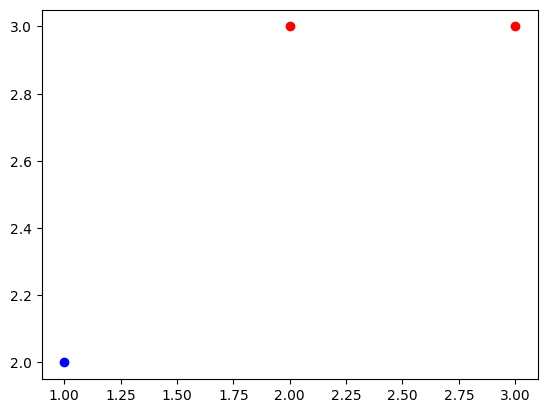

<Figure size 640x480 with 0 Axes>

In [12]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

# RBF

In [13]:
import projetannuel

In [14]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 3
)

model.train_classification(epochs=1_000, learning_rate=0.1)

print(model.predict(X[0]))
Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

PanicException: Matrix and vector dimensions do not match for multiplication.

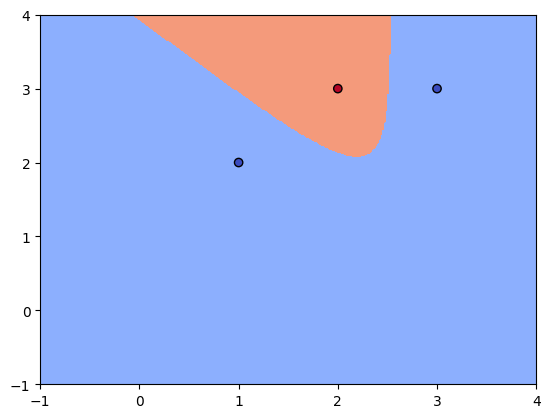

<Figure size 640x480 with 0 Axes>

In [ ]:
xx, yy = np.meshgrid(np.linspace(-1, 4, 300), np.linspace(-1, 4, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()


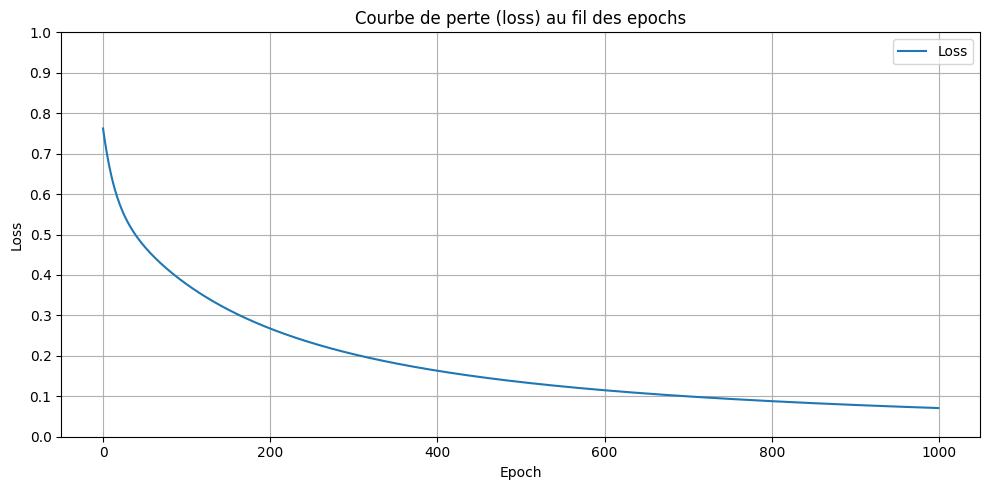

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.train_loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
model = SVM(SVMKernelType.Linear(),SoftMargin.Hard())
model.train(X.tolist(), Y.tolist())

OSQP status   = Solved(Solution { x: [3.9999997000001444, 9.999999240000406, 5.99999954000026], y: [6.999999520000183, 0.0, 0.0, 0.0], polish_status: Successful, obj_val: -9.999999240000431, pri_res: 7.083395321820413e-16, dua_res: 1.1502631698736628e-14 })
Iterations    = 50
Solve time    = 113.1µs
alpha_full    = [3.9999997000001444, 9.999999240000406, 5.99999954000026]


In [ ]:
Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


Accuracy Score : 1.0


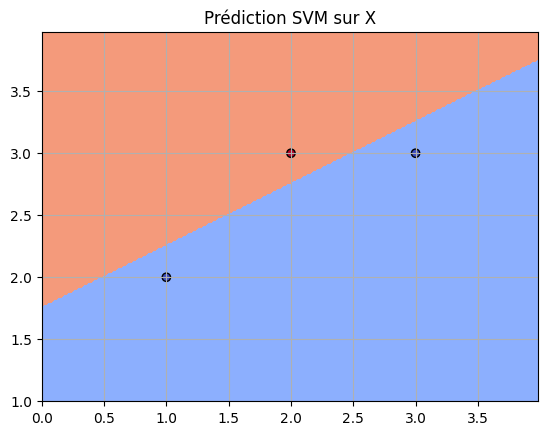

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm_r", edgecolors='k')
plt.title("Prédiction SVM sur X")
plt.grid(True)
plt.show()


### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [ ]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

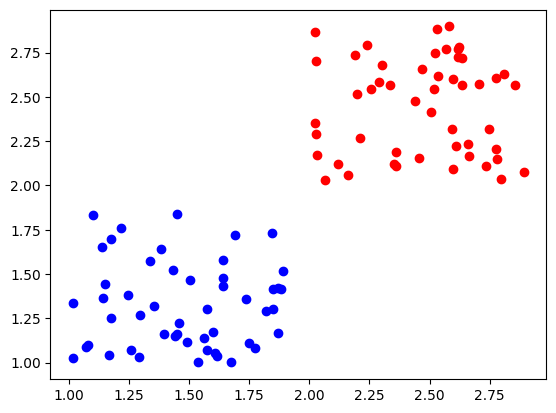

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma=1,
    k=2
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


C:\Users\leopo\AppData\Local\Temp\ipykernel_35644\1043488661.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = projetannuel.float_labels(Y)
C:\Users\leopo\AppData\Local\Temp\ipykernel_35644\1043488661.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")


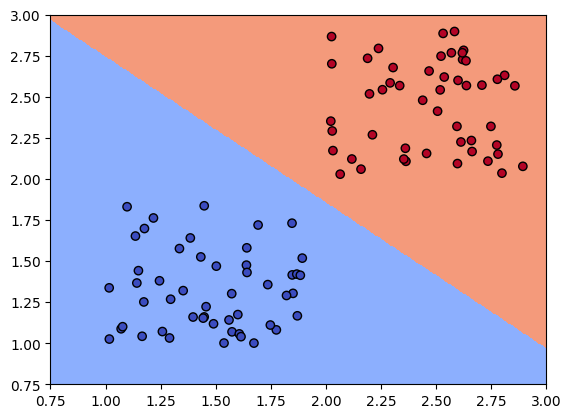

<Figure size 640x480 with 0 Axes>

In [ ]:
xx, yy = np.meshgrid(np.linspace(0.75, 3, 300), np.linspace(0.75, 3, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

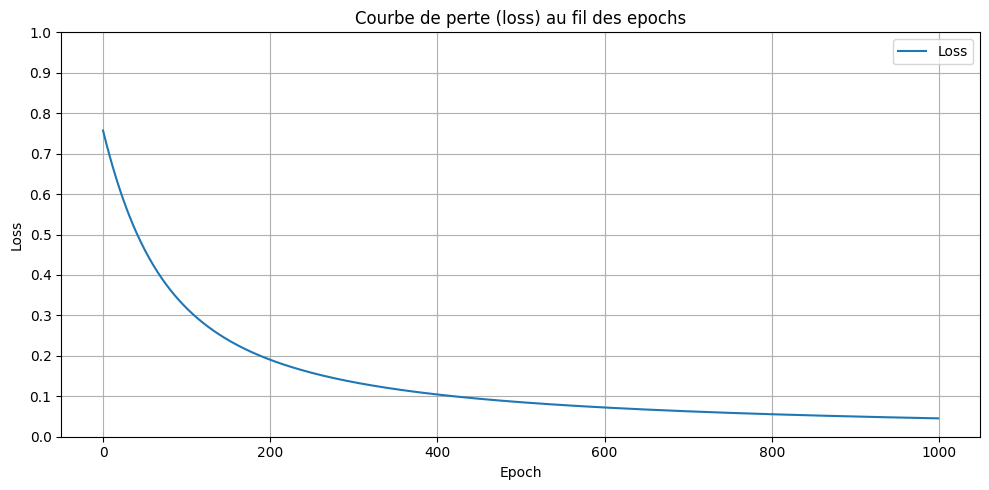

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
model = SVM(SVMKernelType.Linear(),SoftMargin.Hard()) 
model.train(X.tolist(), Y.ravel().tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y.ravel()), Y_pred)}")

OSQP status   = Solved(Solution { x: [-5.411198846247991e-19, -3.8895045687383116e-19, -6.170589282475042e-19, -1.3719898208747813e-18, -3.74155732792325e-19, -1.1091857484107731e-18, -6.546352695171036e-19, -6.920442053432721e-19, -1.3844700829629418e-18, -1.5697087654748e-18, -4.934237579392927e-19, -1.2458651656450888e-18, -1.1920291744781844e-18, -3.6229990348775904e-19, -1.2547669205001674e-18, -1.3143041063514233e-18, -2.3249701806590203e-18, -8.191275432409214e-19, -4.939935317554443e-19, -3.4444484564357513e-19, -2.713806509825024e-18, -5.880244324950311e-19, -1.1120508717628145e-18, -5.51133996360143e-19, -6.415146868037477e-19, -1.9012292398477e-18, -1.6975653068925473e-18, -5.344772947978645e-19, -8.411627642516996e-19, -1.1881643246678412e-18, -2.262444555714869e-18, -2.8563508159105716e-19, -1.1330753527818684e-18, -8.368891420854381e-19, -1.1507057601738727e-18, 14.621248989398966, -5.657344511928832e-19, -2.2918606309482016e-19, -1.1231609362606057e-18, -1.15770157013933

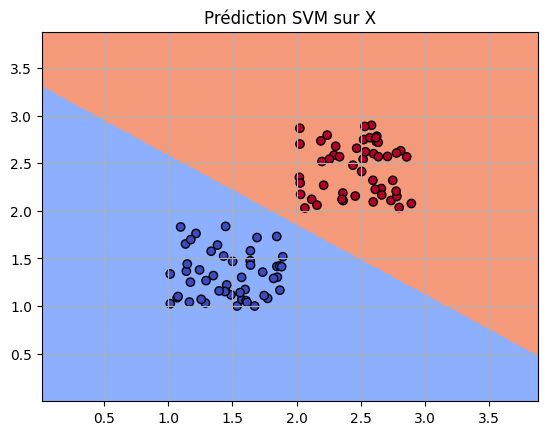

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm_r", edgecolors='k')
plt.title("Prédiction SVM sur X")
plt.grid(True)
plt.show()


### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [ ]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

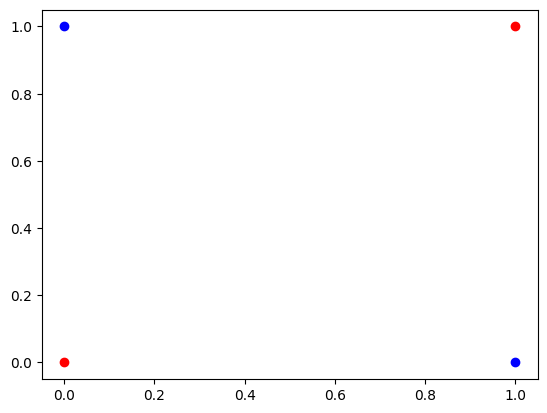

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 4
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 1.0


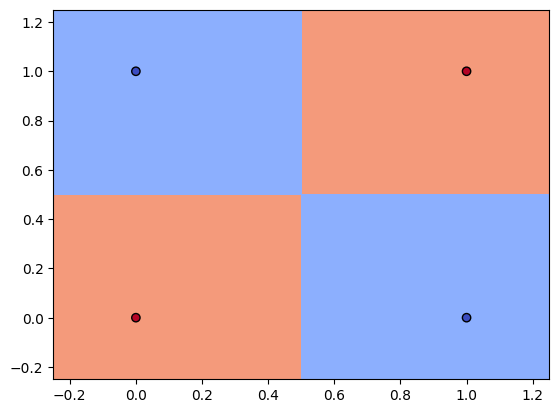

<Figure size 640x480 with 0 Axes>

In [ ]:
xx, yy = np.meshgrid(np.linspace(-0.25, 1.25, 300), np.linspace(-0.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

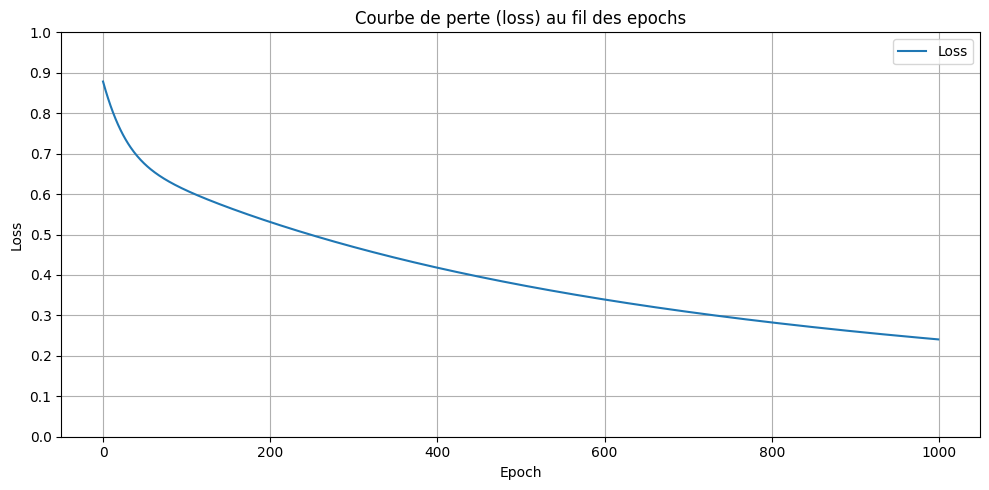

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
model = SVM(SVMKernelType.polynomial(2),SoftMargin.Hard()) 
model.train(X.tolist(), Y.tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

OSQP status   = Solved(Solution { x: [2.666666593333336, 2.666666593333336, 3.3333332400000035, 1.9999999466666685], y: [-0.999999966666667, 0.0, 0.0, 0.0, 0.0], polish_status: Successful, obj_val: -5.333333186666663, pri_res: 2.2204460381697672e-16, dua_res: 1.831867991649213e-15 })
Iterations    = 50
Solve time    = 214.4µs
alpha_full    = [2.666666593333336, 2.666666593333336, 3.3333332400000035, 1.9999999466666685]
Accuracy Score : 1.0


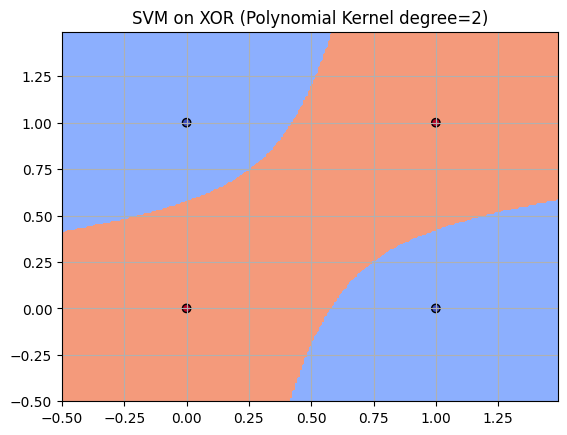

In [ ]:
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm_r", edgecolors='k')
plt.title("SVM on XOR (Polynomial Kernel degree=2)")
plt.grid(True)
plt.show()


























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

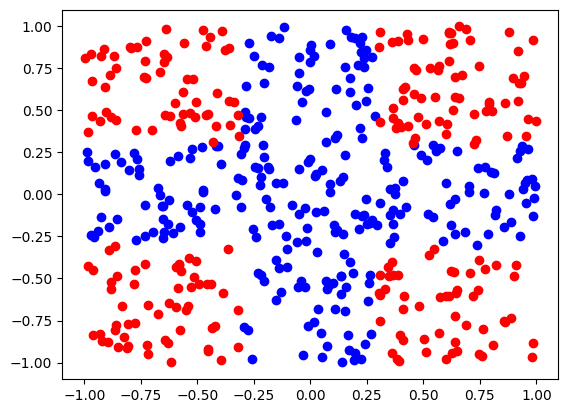

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 10,
    k = 9
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

Accuracy Score : 0.892


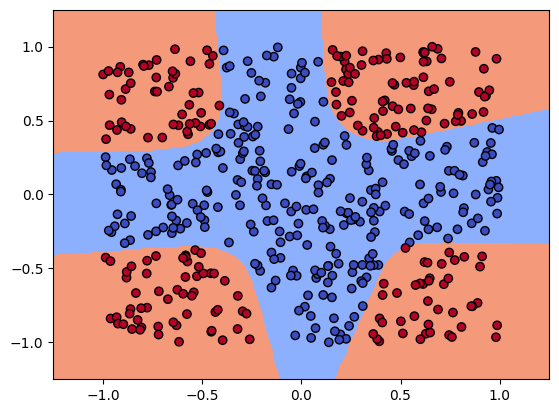

<Figure size 640x480 with 0 Axes>

In [ ]:
xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap='coolwarm_r', edgecolor='k')

plt.show()
plt.clf()

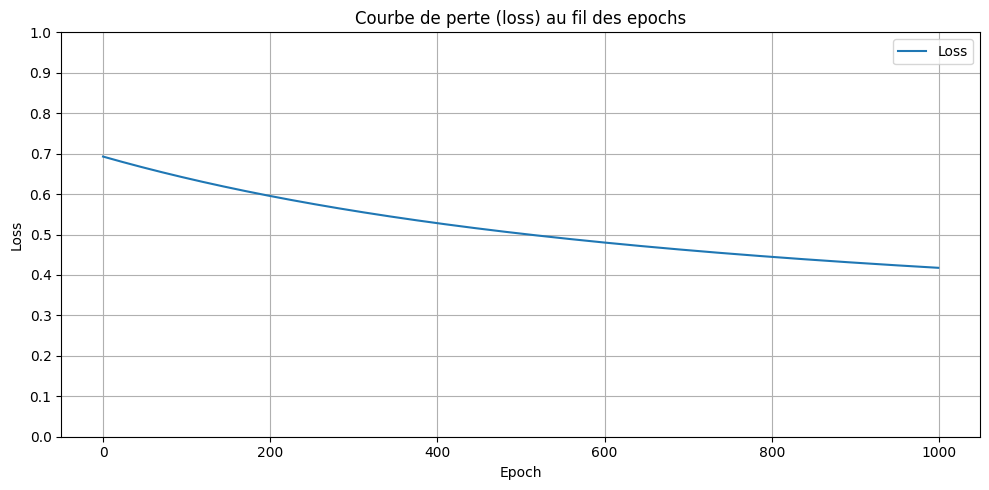

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
model = SVM(SVMKernelType.polynomial(25),SoftMargin.Hard())
model.train(X.tolist(), Y.tolist())

Y_pred = [model.predict([x])[0] for x in X]
print(f"Accuracy Score : {projetannuel.accuracy_score(list(Y), Y_pred)}")

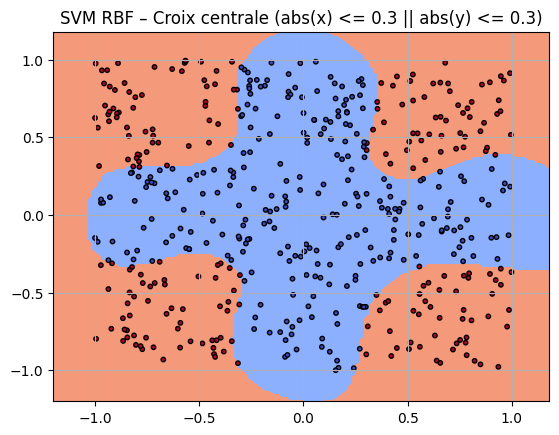

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap='coolwarm_r')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="coolwarm_r", edgecolors='k', s=10)
plt.title("SVM RBF – Croix centrale (abs(x) <= 0.3 || abs(y) <= 0.3)")
plt.grid(True)
plt.show()


### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

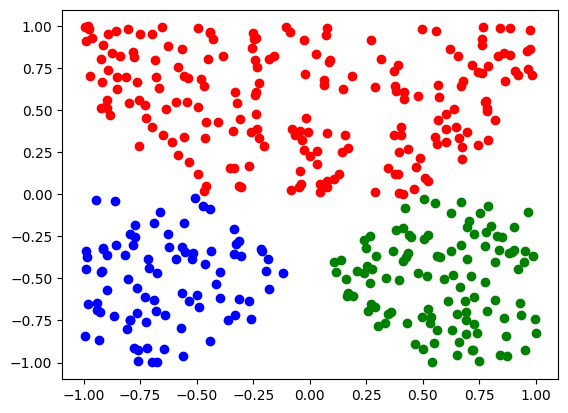

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# RBF

#### Sans multi-classe

In [ ]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.RBF(X, y_i, gamma=1, k=4)
    model_i.train_classification(epochs=1000, learning_rate=0.1, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_acc = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y_acc, Y_pred)}")

Accuracy score : 0.9949494949494949


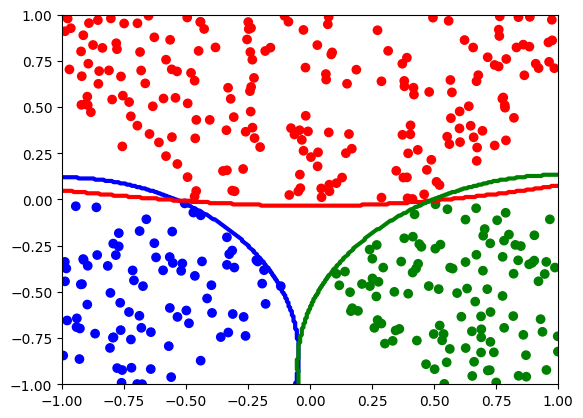

<Figure size 640x480 with 0 Axes>

In [ ]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()


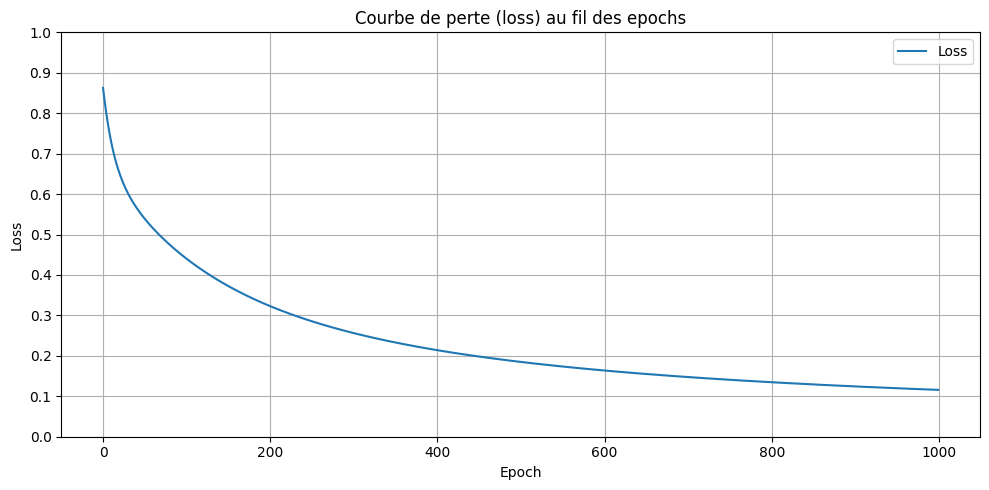

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

#### Avec multi-classe

In [ ]:
new_Y = []
for line in Y:
    new_Y.append(list(line).index(1))
print(new_Y)

[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 

In [ ]:
y = projetannuel.float_labels(new_Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 4
)

model.train_classification(epochs=1_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

Accuracy Score : 1.0


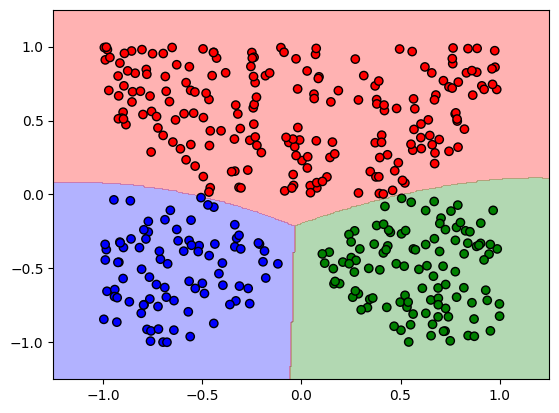

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap=cmap_custom)

plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap=cmap_custom, edgecolor='k')

plt.show()
plt.clf()


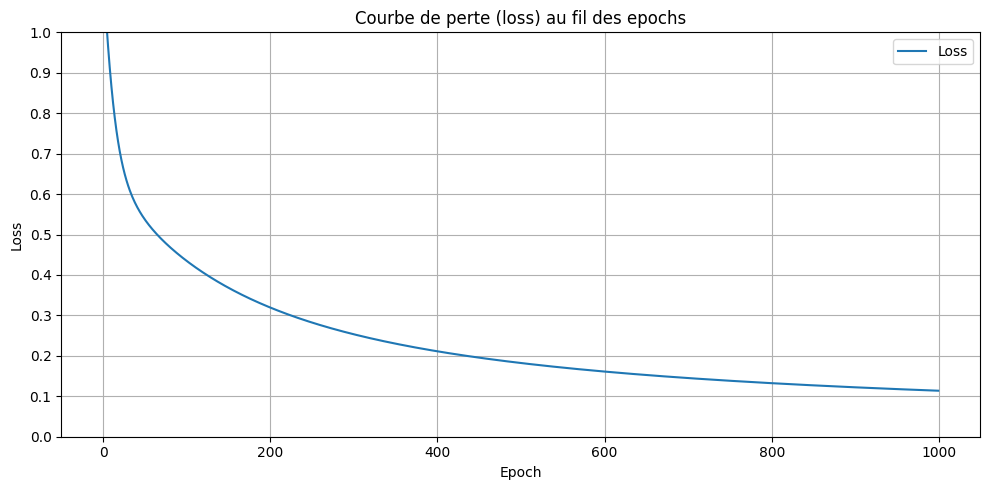

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
y_labels = np.argmax(Y, axis=1)


In [ ]:
svms = []
for i in range(3):
    y_bin = [1.0 if label == i else -1.0 for label in y_labels]
    svm = SVM(SVMKernelType.rbf(1.5),SoftMargin.Hard())
    svm.train(X.tolist(), y_bin)
    svms.append(svm)


OSQP status   = Solved(Solution { x: [-6.512324302511857e-17, -8.962485476541878e-17, -8.898818275623636e-17, -6.21096703423088e-17, -7.694292530253023e-17, -4.9156189802913157e-17, -7.304355703696331e-17, -7.954947296192167e-17, -7.209506336128665e-17, -3.953603367699217e-17, -2.0017394364595524e-18, -8.563259697388465e-17, -4.460360974816813e-18, -7.449776494838856e-17, -5.843247492994693e-17, -3.7114257137039087e-17, -8.002386080820435e-17, -7.419009181236538e-17, -7.759429901238591e-17, -4.1395201374501097e-17, -5.661791529904175e-18, -8.33239011542069e-17, -8.235201026143085e-17, -2.628273077272784e-17, -3.991349539471266e-17, -5.579951934868601e-18, -2.6311639080630803e-18, -5.0236650347742444e-17, -5.97495540808797e-17, -7.924162588532618e-17, -5.641451158743198e-17, -3.9327196913899343e-17, -2.9647861133626125e-17, -9.686601900173675e-17, -1.4091974576446615e-17, -7.067120098407148e-18, -1.516688709168828e-17, -3.4404995837787004e-17, -8.69140502831935e-18, -2.6408951916127428e

In [ ]:
def predict_ova(svms, X):
    preds = []
    for x in X:
        scores = [svm.predict([x])[0] for svm in svms]
        preds.append(np.argmax(scores))
    return preds

y_pred = predict_ova(svms, X)


In [ ]:
print(f"Accuracy Score : {projetannuel.accuracy_score(list(y_labels), y_pred)}")


Accuracy Score : 1.0


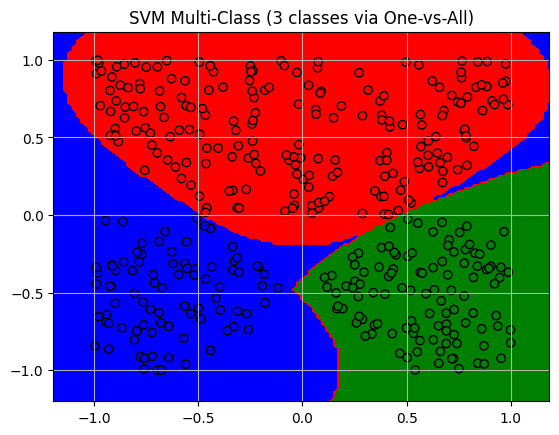

In [ ]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_ova(svms, grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap=cmap_custom)
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap=cmap_custom, edgecolors="k")
plt.title("SVM Multi-Class (3 classes via One-vs-All)")
plt.grid(True)
plt.show()


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

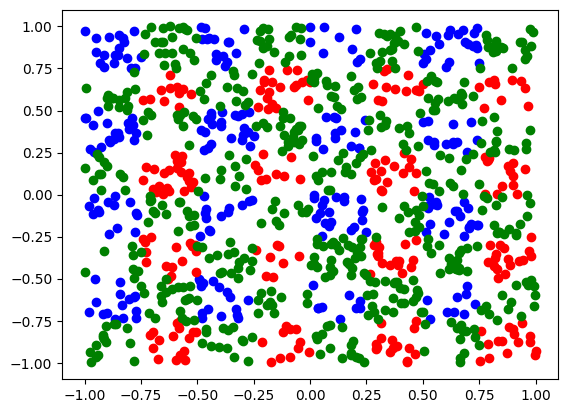

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# RBF

#### Sans multi-classe

In [ ]:
models = []

for i in range(3):
    y_i = [row[i] for row in Y]
    y_i = projetannuel.float_labels(y_i)
    model_i = projetannuel.RBF(X, y_i, gamma=8, k=30)
    model_i.train_classification(epochs=10_000, learning_rate=0.05, algo="gradient-descent")
    models.append(model_i)
    
Y_pred = []
for x in X:
    Y_pred.append([model.predict(x) for model in models])

Y_acc = [list(y) for y in Y]     
print(f"Accuracy score : {projetannuel.accuracy_score(Y_acc, Y_pred)}")

Accuracy score : 0.479


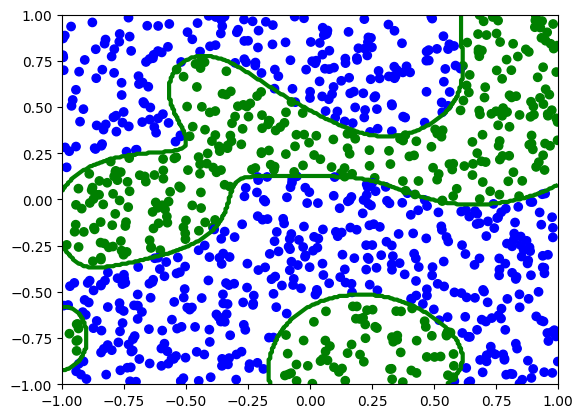

<Figure size 640x480 with 0 Axes>

In [ ]:
colors_pred = ["blue", "red", "green"]

plt.scatter(np.array(X)[:,0], np.array(X)[:,1], 
            c=[colors_pred[np.argmax(y)] for y in Y_pred])

xx, yy = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

colors_boundary = ["blue", "red", "green"]

for idx, model in enumerate(models):
    Z = np.array([float(model.predict(list(p))) for p in grid])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors=[colors_boundary[idx]], linewidths=3)

plt.show()
plt.clf()


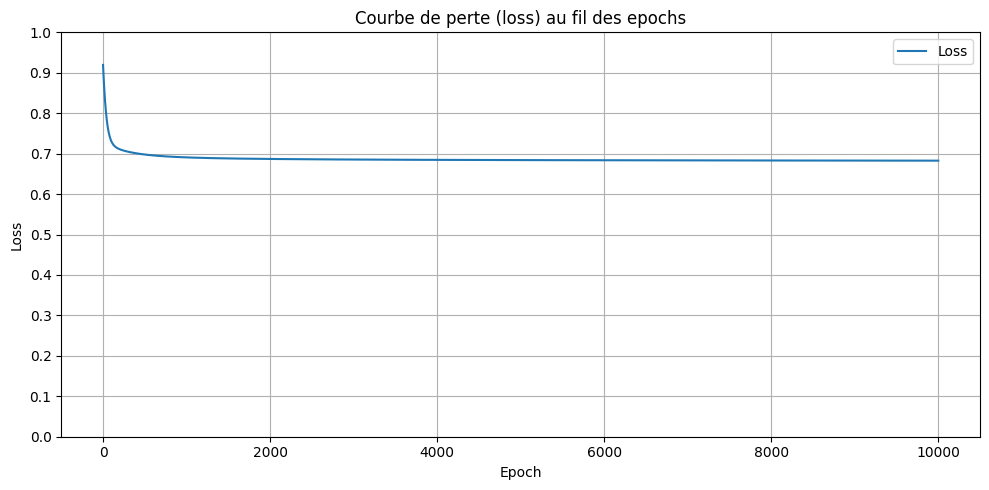

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

#### Avec multi-classe

In [ ]:
new_Y = []
for line in Y:
    new_Y.append(list(line).index(1))
print(new_Y)

[0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 

In [ ]:
y = projetannuel.float_labels(new_Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 200,
    k = 60
)

model.train_classification(epochs=10_000, learning_rate=0.1, algo="gradient-descent")

Y_pred = [model.predict(x) for x in X]

print(f"Accuracy Score : {projetannuel.accuracy_score(list(new_Y), Y_pred)}")

Accuracy Score : 0.746


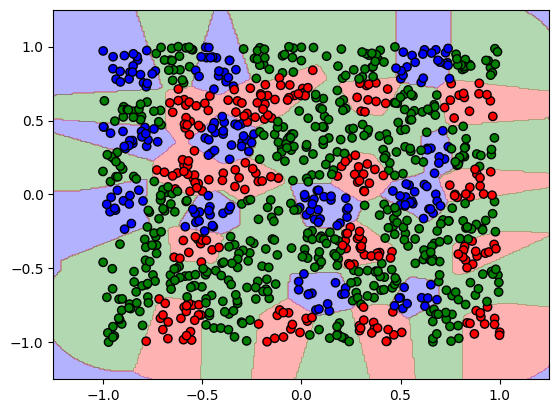

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 300), np.linspace(-1.25, 1.25, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict(list(p)) for p in grid])

Z = np.array([float(z) for z in Z])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(model.num_classes + 1) - 0.5, cmap=cmap_custom)

plt.scatter(X[:,0], X[:,1], c=Y_pred, cmap=cmap_custom, edgecolor='k')

plt.show()
plt.clf()

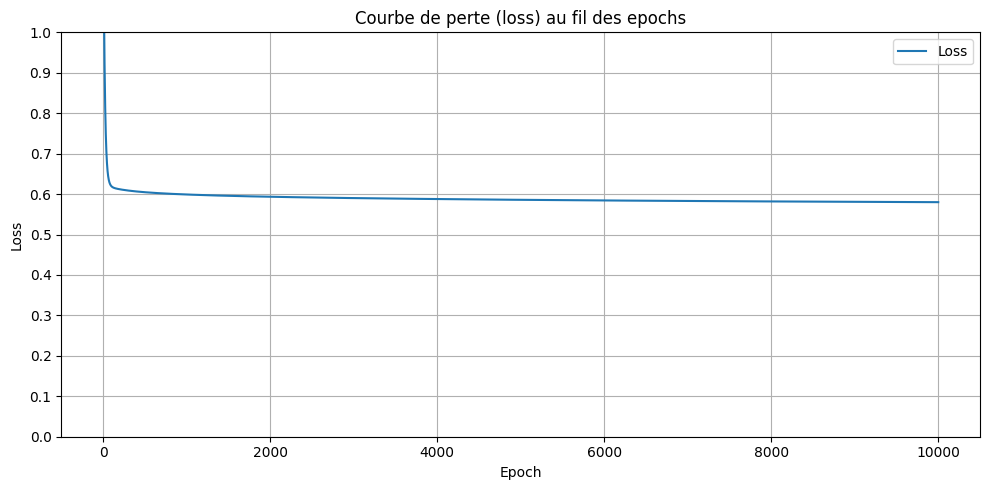

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# SVM

In [ ]:
y_labels = np.argmax(Y, axis=1)


svms = []
for i in range(3):
    y_bin = [1.0 if label == i else -1.0 for label in y_labels]
    svm = SVM(SVMKernelType.rbf(10.0),SoftMargin.Hard())  
    svm.train(X.tolist(), y_bin)
    svms.append(svm)

def predict_ova(svms, X):
    return [np.argmax([svm.predict([x])[0] for svm in svms]) for x in X]

y_pred = predict_ova(svms, X)
print(f"Accuracy Score : {projetannuel.accuracy_score(list(y_labels), y_pred)}")


OSQP status   = Solved(Solution { x: [6.860383074544022e-7, 5.2429113644775064e-8, -2.1075278234840333e-5, -8.77984012268831e-8, -2.536422791690617e-6, 1.0904854241729716e-6, 6.766424648156059e-7, 8.886869503681218e-7, -6.509820848262113e-6, 7.844180896785324e-7, -3.847530977098004e-6, -1.1089161906481969e-5, 2.726745923708273e-6, -3.270815015759859e-5, -1.0778449823492598e-6, -0.0002399000835849905, 2.3708688632048717e-6, 2.5539427850518413e-7, -2.4749739008834223e-5, -9.04380202982225e-7, 6.895335291047433e-8, 6.406516894150939e-7, 8.125746501028401e-6, -3.6879724015025584e-6, 2.1763198810715855e-6, -0.0001228755046745684, 1.2169528939556989e-6, -6.852346434121855e-5, -2.0609349988333564e-7, -0.0002869869298332936, -0.0005018831587736831, -2.1441718880527153e-6, -1.1814480089018244e-6, -2.062669046891053e-5, -3.2969956383575457e-6, 4.286484609040905e-6, 4.886559993663461e-6, 3.2621124233161384e-7, 9.096646391842965e-8, -1.8682115387672566e-7, -3.5093056219320727e-7, 3.835134337386999

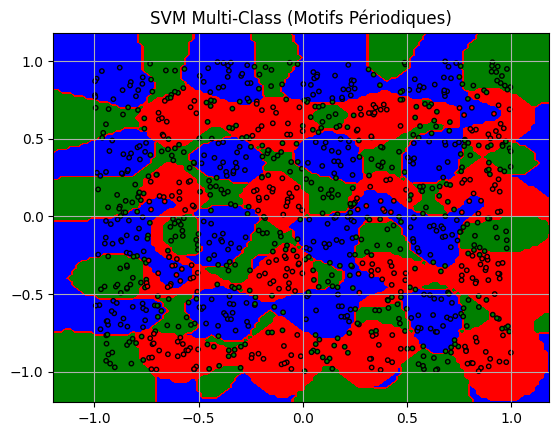

In [ ]:
import matplotlib.colors as mcolors

cmap_custom = mcolors.ListedColormap(['blue', 'red', 'green'])

h = 0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_ova(svms, grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5], cmap=cmap_custom)
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap=cmap_custom, edgecolors="k", s=10)
plt.title("SVM Multi-Class (Motifs Périodiques)")
plt.grid(True)
plt.show()


## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      10,
      5
])

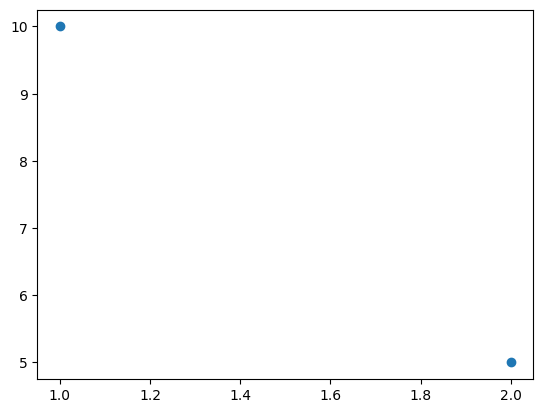

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 5,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.00028374956101552545
RMSE : 0.016844867497713523


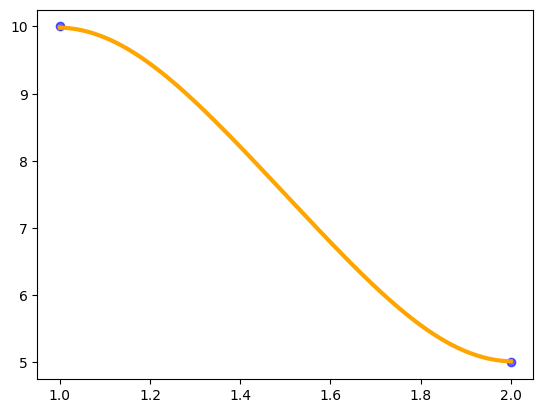

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

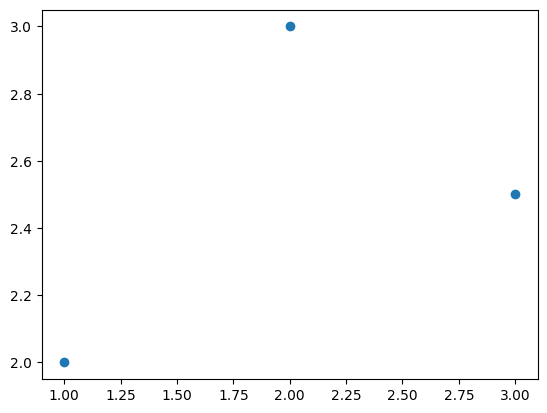

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 1.1970964236728854e-28
RMSE : 1.094119017142507e-14


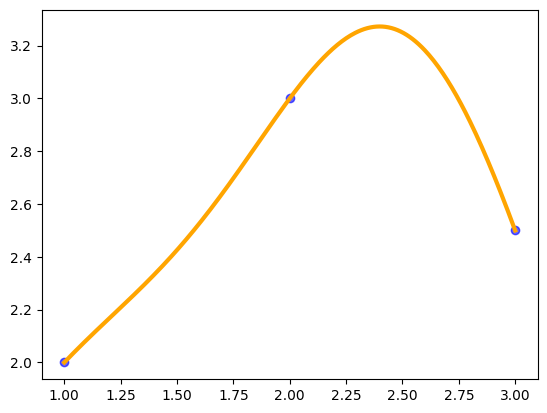

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X, Y, color='blue', alpha=0.6)

x1 = np.linspace(min(X), max(X), 300)
x1_reshaped = x1.reshape(-1, 1)

y_pred = np.array([model.predict(list(p)) for p in x1_reshaped])

plt.plot(x1, y_pred, c='orange', lw=3)

plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

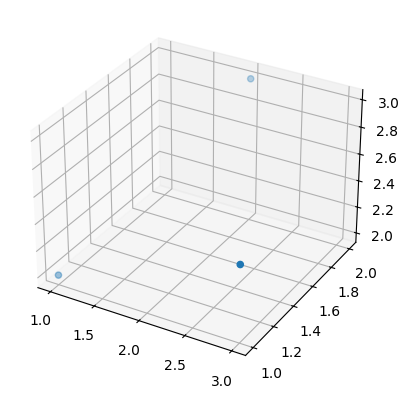

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 0.1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 6.745286646909798e-27
RMSE : 8.212969406316937e-14


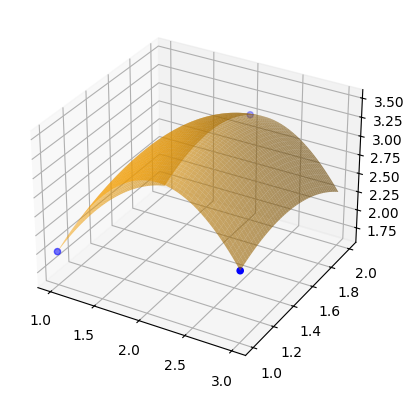

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

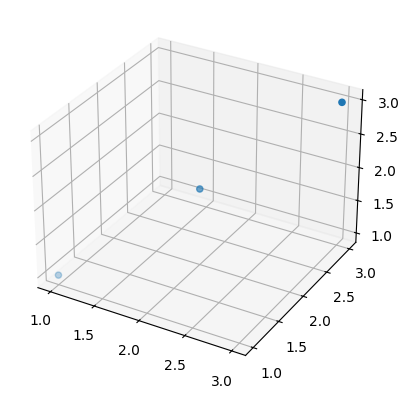

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 0.1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 5.201880285844888e-28
RMSE : 2.280763092880295e-14


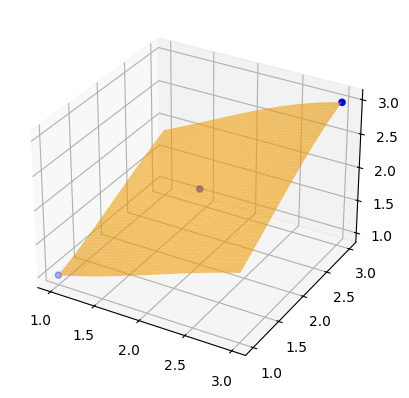

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

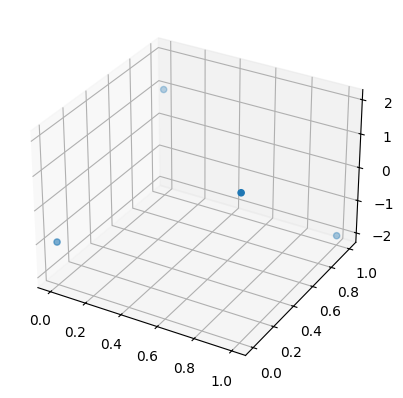

<Figure size 640x480 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# RBF

In [ ]:
y = projetannuel.float_labels(Y)

model = projetannuel.RBF(
    X,
    y,
    gamma = 1,
    k = 2
)

model.train_regression()

Y_pred = [model.predict(x) for x in X]

print(f"MSE : {projetannuel.mean_squared_error(list(Y), Y_pred)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(list(Y), Y_pred)}")

MSE : 0.125
RMSE : 0.3535533905932738


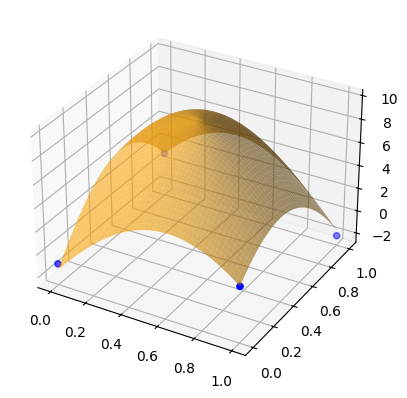

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Données')

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = np.array([model.predict(list(p)) for p in grid_points])
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.6)

plt.show()
plt.clf()